In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

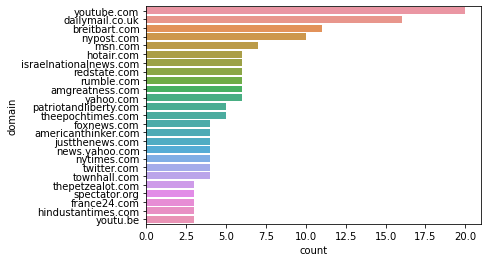

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

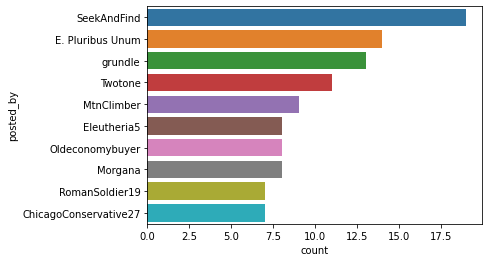

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain         \
                                              count unique   
domain                 posted_by                             
americanthinker.com    MtnClimber                 4      1   
amgreatness.com        MtnClimber                 2      1   
                       E. Pluribus Unum           1      1   
breitbart.com          ChicagoConservative27      7      1   
dailymail.co.uk        Morgana                    5      1   
france24.com           Oldeconomybuyer            1      1   
hotair.com             SeekAndFind                5      1   
israelnationalnews.com Eleutheria5                6      1   
justthenews.com        E. Pluribus Unum           3      1   
                       Twotone                    1      1   
msn.com                RomanSoldier19             1      1   
news.yahoo.com         Oldeconomybuyer            1      1   
nypost.com             E. Pluribus Unum           1      1   
                       Oldeconomybuyer            1      1   
                       Twotone                    1      1   
                       RomanSoldier19             1      1   
redstate.com           SeekAndFind                6      1   
rumble.com             E. Pluribus Unum           1      1   
                       grundle                    2      1   
spectator.org          E. Pluribus Unum           1      1   
                       Twotone                    1      1   
theepochtimes.com      SeekAndFind                1      1   
townhall.com           E. Pluribus Unum           1      1   
twitter.com            grundle                    1      1   
yahoo.com              grundle                    5      1   
youtube.com            Eleutheria5                2      1   
                       grundle                    1      1   

                                                                           
                                                                 top freq  
domain                 posted_by                                           
americanthinker.com    MtnClimber                americanthinker.com    4  
amgreatness.com        MtnClimber                    amgreatness.com    2  
                       E. Pluribus Unum              amgreatness.com    1  
breitbart.com          ChicagoConservative27           breitbart.com    7  
dailymail.co.uk        Morgana                       dailymail.co.uk    5  
france24.com           Oldeconomybuyer                  france24.com    1  
hotair.com             SeekAndFind                        hotair.com    5  
israelnationalnews.com Eleutheria5            israelnationalnews.com    6  
justthenews.com        E. Pluribus Unum              justthenews.com    3  
                       Twotone                       justthenews.com    1  
msn.com                RomanSoldier19                        msn.com    1  
news.yahoo.com         Oldeconomybuyer                news.yahoo.com    1  
nypost.com             E. Pluribus Unum                   nypost.com    1  
                       Oldeconomybuyer                    nypost.com    1  
                       Twotone                            nypost.com    1  
                       RomanSoldier19                     nypost.com    1  
redstate.com           SeekAndFind                      redstate.com    6  
rumble.com             E. Pluribus Unum                   rumble.com    1  
                       grundle                            rumble.com    2  
spectator.org          E. Pluribus Unum                spectator.org    1  
                       Twotone                         spectator.org    1  
theepochtimes.com      SeekAndFind                 theepochtimes.com    1  
townhall.com           E. Pluribus Unum                 townhall.com    1  
twitter.com            grundle                           twitter.com    1  
yahoo.com              grundle                             yahoo.com    5  
youtube.com            Eleutheria5                      

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
